\title{*myHDL* to *PYNQ-Z1/2* Fabric Only Examples}
\author{Steven K Armour}
\maketitle

These are a rework of the excellent example *ARTY* tutorials by Will Green of [*Time to Explore*](https://timetoexplore.net/). But reworked in python's *myHDL* module to then regenerate Verilog/VHDL code that with the appropriate constraints can be redeployed on the *PYNQ-Z1/2* board using only the programmable logic of its ZYNQ-7000 FPGA. 

(These examples do not use the FPGA's SoC capability and thus do not use the *PYNQ* (Python Productivity for ZYNQ) SDK wrapper )

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#References" data-toc-modified-id="References-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>References</a></span></li><li><span><a href="#Libraries-and-Helper-functions" data-toc-modified-id="Libraries-and-Helper-functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libraries and Helper functions</a></span></li><li><span><a href="#How-to-load-the-Verilog-Sources,-Testbench,-and-Constraints-into-Vivado" data-toc-modified-id="How-to-load-the-Verilog-Sources,-Testbench,-and-Constraints-into-Vivado-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>How to load the Verilog Sources, Testbench, and Constraints into Vivado</a></span></li><li><span><a href="#Project-1:-1-Switch-1-LED" data-toc-modified-id="Project-1:-1-Switch-1-LED-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Project 1: 1 Switch 1 LED</a></span><ul class="toc-item"><li><span><a href="#myHDL-Code" data-toc-modified-id="myHDL-Code-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>myHDL Code</a></span></li><li><span><a href="#myHDL-Testing" data-toc-modified-id="myHDL-Testing-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>myHDL Testing</a></span></li><li><span><a href="#Verilog-Code" data-toc-modified-id="Verilog-Code-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Verilog Code</a></span></li><li><span><a href="#PYNQ-Z1-Constraints-File" data-toc-modified-id="PYNQ-Z1-Constraints-File-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>PYNQ-Z1 Constraints File</a></span></li><li><span><a href="#Verilog-Testbench" data-toc-modified-id="Verilog-Testbench-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Verilog Testbench</a></span></li><li><span><a href="#Board-Verification" data-toc-modified-id="Board-Verification-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Board Verification</a></span></li></ul></li><li><span><a href="#Project-2:-2-Switches-4-LEDS" data-toc-modified-id="Project-2:-2-Switches-4-LEDS-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Project 2: 2 Switches 4 LEDS</a></span><ul class="toc-item"><li><span><a href="#myHDL-Code" data-toc-modified-id="myHDL-Code-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>myHDL Code</a></span></li><li><span><a href="#myHDL-Testing" data-toc-modified-id="myHDL-Testing-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>myHDL Testing</a></span></li><li><span><a href="#Verilog-Code" data-toc-modified-id="Verilog-Code-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Verilog Code</a></span></li><li><span><a href="#Verilog-Testbench-(ToDo)" data-toc-modified-id="Verilog-Testbench-(ToDo)-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Verilog Testbench (ToDo)</a></span></li><li><span><a href="#PYNQ-Z1-Constraints-File" data-toc-modified-id="PYNQ-Z1-Constraints-File-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>PYNQ-Z1 Constraints File</a></span></li><li><span><a href="#Board-Verification" data-toc-modified-id="Board-Verification-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Board Verification</a></span></li></ul></li><li><span><a href="#Project-3:-Countdown" data-toc-modified-id="Project-3:-Countdown-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Project 3: Countdown</a></span><ul class="toc-item"><li><span><a href="#myHDL-Code" data-toc-modified-id="myHDL-Code-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>myHDL Code</a></span></li><li><span><a href="#myHDL-Testing-(Needs-Improvements)" data-toc-modified-id="myHDL-Testing-(Needs-Improvements)-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>myHDL Testing (Needs Improvements)</a></span></li><li><span><a href="#Verilog-Code" data-toc-modified-id="Verilog-Code-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Verilog Code</a></span></li><li><span><a href="#Verilog-Testbench" data-toc-modified-id="Verilog-Testbench-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Verilog Testbench</a></span><ul class="toc-item"><li><span><a href="#Conversion-Issue" data-toc-modified-id="Conversion-Issue-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Conversion Issue</a></span></li></ul></li><li><span><a href="#PYNQ-Z1-Constraints-File" data-toc-modified-id="PYNQ-Z1-Constraints-File-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>PYNQ-Z1 Constraints File</a></span></li><li><span><a href="#Board-Verification" data-toc-modified-id="Board-Verification-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Board Verification</a></span></li></ul></li><li><span><a href="#Project-4:-Basic-Duty-Cycle" data-toc-modified-id="Project-4:-Basic-Duty-Cycle-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Project 4: Basic Duty Cycle</a></span><ul class="toc-item"><li><span><a href="#myHDL-Code" data-toc-modified-id="myHDL-Code-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>myHDL Code</a></span></li><li><span><a href="#myHDL-Testing" data-toc-modified-id="myHDL-Testing-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>myHDL Testing</a></span></li><li><span><a href="#Verilog-Code" data-toc-modified-id="Verilog-Code-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Verilog Code</a></span></li><li><span><a href="#PYNQ-Z1-Constraints-File" data-toc-modified-id="PYNQ-Z1-Constraints-File-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>PYNQ-Z1 Constraints File</a></span></li><li><span><a href="#Verilog-Testbench" data-toc-modified-id="Verilog-Testbench-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Verilog Testbench</a></span></li><li><span><a href="#Board-Verification" data-toc-modified-id="Board-Verification-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Board Verification</a></span></li></ul></li><li><span><a href="#Project-5:-Mid-level-pwm-LED" data-toc-modified-id="Project-5:-Mid-level-pwm-LED-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Project 5: Mid-level pwm LED</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#pwm-myHDL-Code" data-toc-modified-id="pwm-myHDL-Code-8.0.1"><span class="toc-item-num">8.0.1&nbsp;&nbsp;</span>pwm myHDL Code</a></span></li><li><span><a href="#pwm-myHDL-Testing" data-toc-modified-id="pwm-myHDL-Testing-8.0.2"><span class="toc-item-num">8.0.2&nbsp;&nbsp;</span>pwm myHDL Testing</a></span></li><li><span><a href="#pwm-Verilog-Code" data-toc-modified-id="pwm-Verilog-Code-8.0.3"><span class="toc-item-num">8.0.3&nbsp;&nbsp;</span>pwm Verilog Code</a></span></li><li><span><a href="#pwm-PYNQ-Z1-Constraints-File" data-toc-modified-id="pwm-PYNQ-Z1-Constraints-File-8.0.4"><span class="toc-item-num">8.0.4&nbsp;&nbsp;</span>pwm PYNQ-Z1 Constraints File</a></span></li><li><span><a href="#pwm-Verilog-Testbench" data-toc-modified-id="pwm-Verilog-Testbench-8.0.5"><span class="toc-item-num">8.0.5&nbsp;&nbsp;</span>pwm Verilog Testbench</a></span></li></ul></li><li><span><a href="#top-myHDL-Code" data-toc-modified-id="top-myHDL-Code-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>top myHDL Code</a></span></li><li><span><a href="#myHDL-Testing" data-toc-modified-id="myHDL-Testing-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>myHDL Testing</a></span></li><li><span><a href="#Verilog-Code" data-toc-modified-id="Verilog-Code-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Verilog Code</a></span></li><li><span><a href="#PYNQ-Z1-Constraints-File" data-toc-modified-id="PYNQ-Z1-Constraints-File-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>PYNQ-Z1 Constraints File</a></span></li><li><span><a href="#Verilog-Testbench" data-toc-modified-id="Verilog-Testbench-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>Verilog Testbench</a></span></li><li><span><a href="#Board-Verification" data-toc-modified-id="Board-Verification-8.6"><span class="toc-item-num">8.6&nbsp;&nbsp;</span>Board Verification</a></span></li></ul></li></ul></div>

# References 
@misc{green_2017,
title={Arty FPGA 01: Hello World with Verilog & Vivado},
url={https://timetoexplore.net/blog/arty-fpga-verilog-01},
journal={Time to Explore},
author={Green, Will},
year={2017}
},

@misc{green_2017,
title={Arty FPGA 02: Clocks, Counting, & Colour},
url={https://timetoexplore.net/blog/arty-fpga-verilog-02},
journal={Time to Explore},
author={Green, Will},
year={2017}
},

@book{ogden_2017,
place={https://github.com/Xilinx/PYNQ/blob/master/sdbuild/boot_configs/Pynq-Z1-defconfig/constraints.xdc},
title={PYNQ/sdbuild/boot_configs/Pynq-Z1-defconfig/constraints.xdc},
publisher={PYNQ},
author={Ogden, Peter},
year={2017}
}

# Libraries and Helper functions

In [1]:
#this notebook was written to utlize the `(some) LaTeX environments for Jupyter notebook
#` exstantion found here
#https://github.com/ProfFan/latex_envs

from myhdl import *
from myhdlpeek import Peeker
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sympy import *
init_printing()

#https://github.com/jrjohansson/version_information
%load_ext version_information
%version_information myhdl, myhdlpeek, numpy, pandas, matplotlib, sympy

Software versions
Python 3.6.2 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 6.2.1
OS Linux 4.15.0 30 generic x86_64 with debian stretch sid
myhdl 0.10
myhdlpeek 0.0.6
numpy 1.13.3
pandas 0.23.3
matplotlib 2.1.0
sympy 1.1.2.dev
Mon Aug 20 12:42:52 2018 MDT

In [2]:
#helper  functions to read in the .v and .vhd generated files into python
def VerilogTextReader(loc, printresult=True):
    with open(f'{loc}.v', 'r') as vText:
        VerilogText=vText.read()
    if printresult:
        print(f'***Verilog modual from {loc}.v***\n\n', VerilogText)
    return VerilogText

def VHDLTextReader(loc, printresult=True):
    with open(f'{loc}.vhd', 'r') as vText:
        VerilogText=vText.read()
    if printresult:
        print(f'***VHDL modual from {loc}.vhd***\n\n', VerilogText)
    return VerilogText

# How to load the Verilog Sources, Testbench, and Constraints into Vivado
This is not a tutorial on the usage of Xilinx's Vivado, for that information see the original source material from **Time to Explore** https://timetoexplore.net/blog/arty-fpga-verilog-01  &  https://timetoexplore.net/blog/arty-fpga-verilog-02 . However, here is some additional information that might prove useful. 

First, when you run each project in this notebook three Verilog scripts will be generated. Typically the first is `tb_*.v` which is generated by the internal *myHDL* simulator. DO NOT LOAD THESE INTO VIVADO. The second script is the actual Verilog/VHDL code that is loaded into sources. A showing of which is rendered below the cells titled **Verilog Code**, if you wish to use VHDL instead of Verilog please see the *myHDL* documentation on how to convert to VHDL from myHDL. The Third file is the testbench that is made to run in Verilog (I have only ever generated Verilog Testbench so conversion to VHDL is at your own risk) the file name is `*_TBV.v` these should be sourced under simulation sources in Vivado. The constraint files `*.xdc` should be sourced as constraint sources. Finally when running each project in Vivado you will need to go under the sources tab and right click on the source and simulation source files and set them to **Top** and in the constraints section I would right click and disable any constraint sources that are not the appropriate constraint source for the selected **Top** modules. Finlay whenever the notebook/notebook cells that generate Verilog/VHDL code run they will rewrite the target file. This means that Vivado will see a change in the source and will then ask you to refresh the project. If you are past the Simulation Stage you will want to avoid doing this as it will be time-consuming.


# Project 1: 1 Switch 1 LED
From https://timetoexplore.net/blog/arty-fpga-verilog-01
creates a simple single switch controlled LED

## myHDL Code

In [3]:
@block
def S0L0(sw, clk, led):
    """
    FPGA Hello world of one switch controlling one LED based on
    https://timetoexplore.net/blog/arty-fpga-verilog-01
    
    Target:
        ZYNQ 7000 Board (Arty, PYNQ-Z1, PYNQ-Z2) with at least 2 
        switchs and 4 leds
    
    
    Input:
        sw(2bitVec):switch input from PYNQ-Z1/2 (ect.)
        clk(bool): clock input    
    Ouput:
        led(4bitVec): led output to PYNQ-Z1/2 (ect.)
        
    """
    
    @always(clk.posedge)
    def logic():
        if sw[0]==0:
            led.next[0]=True
        else:
            led.next[0]=False
    
    return instances()

## myHDL Testing

In [4]:
Peeker.clear()
clk=Signal(bool(0)); Peeker(clk, 'clk')
sw=Signal(intbv(0)[2:]); Peeker(sw, 'sw')
led=Signal(intbv(0)[4:]); Peeker(led, 'led')

np.random.seed(18)
swTVals=[int(i) for i in np.random.randint(0,2, 10)]

DUT=S0L0(sw, clk, led)

def S0L0_TB():
    """
    myHDL only Testbench for `S0L0`
    """
    
    @always(delay(1))
    def ClkGen():
        clk.next=not clk
        
    @instance
    def stimules():
        for i in range(10):
            sw.next[0]=swTVals[i]
            yield clk.posedge
        raise StopSimulation()
    
    return instances()
            
sim=Simulation(DUT, S0L0_TB(), *Peeker.instances()).run()

In [5]:
Peeker.to_wavedrom()

In [6]:
S0L0Data=Peeker.to_dataframe()
S0L0Data=S0L0Data[S0L0Data['clk']==1]
S0L0Data.reset_index(drop=True, inplace=True)
S0L0Data

,clk,led,sw
0,1,1,1
1,1,0,0
2,1,1,1
3,1,0,0
4,1,1,1
5,1,0,0
6,1,1,0
7,1,1,0
8,1,1,0


## Verilog Code

In [7]:
DUT.convert()
VerilogTextReader('S0L0');

***Verilog modual from S0L0.v***

 // File: S0L0.v
// Generated by MyHDL 0.10
// Date: Mon Aug 20 12:43:02 2018


`timescale 1ns/10ps

module S0L0 (
    sw,
    clk,
    led
);
// FPGA Hello world of one switch controlling one LED based on
// https://timetoexplore.net/blog/arty-fpga-verilog-01
// 
// Target:
//     ZYNQ 7000 Board (Arty, PYNQ-Z1, PYNQ-Z2) with at least 2 
//     switchs and 4 leds
// 
// 
// Input:
//     sw(2bitVec):switch input from PYNQ-Z1/2 (ect.)
//     clk(bool): clock input    
// Ouput:
//     led(4bitVec): led output to PYNQ-Z1/2 (ect.)
//     

input [1:0] sw;
input clk;
output [3:0] led;
reg [3:0] led;




always @(posedge clk) begin: S0L0_LOGIC
    if ((sw[0] == 0)) begin
        led[0] <= 1'b1;
    end
    else begin
        led[0] <= 1'b0;
    end
end

endmodule



\begin{figure}
\centerline{\includegraphics[width=10cm]{S0L0_RTL.png}}
\caption{\label{fig:S0L0RTL} S0L0 RTL schematic; Xilinx Vivado 2017.4}
\end{figure}

\begin{figure}
\centerline{\includegraphics[width=10cm]{S0L0_SYN.png}}
\caption{\label{fig:S0L0SYN} S0L0 Synthesized Schematic; Xilinx Vivado 2017.4}
\end{figure}

\begin{figure}
\centerline{\includegraphics[width=10cm]{S0L0_SYN.png}}
\caption{\label{fig:S0L0SYN} S0L0 Implementated Schematic; Xilinx Vivado 2017.4}
\end{figure}

## PYNQ-Z1 Constraints File
Below is what is found in file `constrs_S0L0.xdc`

Notice that the original port names found in the PYNQ-Z1 Constraints file have been changed to the port names in the module `S0L0`

## Verilog Testbench

In [8]:
swTVal=intbv(int(''.join([str(i) for i in swTVals]), 2))[len(swTVals):]
print(f'swTest: {swTVals}, {swTVal}, {[int(i) for i in swTVal]}')

swTest: [0, 1, 0, 1, 0, 1, 0, 0, 0, 0], 150, [0, 1, 0, 1, 0, 1, 0, 0, 0, 0]


In [9]:
@block
def S0L0_TBV():
    """
    myHDL -> Verilog Testbench for `S0L0`
    """
    clk=Signal(bool(0))
    sw=Signal(intbv(0)[2:])
    led=Signal(intbv(0)[4:])
    
    #test stimuli
    swTVals=Signal(swTVal)
    
    @always_comb
    def print_data():
        print(sw, clk, led)


    DUT=S0L0(sw, clk, led)
    
    @instance
    def clk_signal():
        while True:
            clk.next = not clk
            yield delay(1)
        
    @instance
    def stimules():
        for i in range(10):
            sw.next[0]=swTVals[i]
            yield clk.posedge
        raise StopSimulation()
    
    return instances()
            
TB=S0L0_TBV()
TB.convert(hdl="Verilog", initial_values=True)
VerilogTextReader('S0L0_TBV');

<class 'myhdl._Signal._Signal'> <class '_ast.Name'>
<class 'myhdl._Signal._Signal'> <class '_ast.Name'>
<class 'myhdl._Signal._Signal'> <class '_ast.Name'>
***Verilog modual from S0L0_TBV.v***

 // File: S0L0_TBV.v
// Generated by MyHDL 0.10
// Date: Mon Aug 20 12:43:47 2018


`timescale 1ns/10ps

module S0L0_TBV (

);
// myHDL -> Verilog Testbench for `S0L0`


reg clk = 0;
reg [1:0] sw = 0;
reg [3:0] led = 0;
wire [9:0] swTVals;

assign swTVals = 10'd336;


always @(led, sw, clk) begin: S0L0_TBV_PRINT_DATA
    $write("%h", sw);
    $write(" ");
    $write("%h", clk);
    $write(" ");
    $write("%h", led);
    $write("\n");
end


always @(posedge clk) begin: S0L0_TBV_S0L00_0_LOGIC
    if ((sw[0] == 0)) begin
        led[0] <= 1'b1;
    end
    else begin
        led[0] <= 1'b0;
    end
end


initial begin: S0L0_TBV_CLK_SIGNAL
    while (1'b1) begin
        clk <= (!clk);
        # 1;
    end
end


initial begin: S0L0_TBV_STIMULES
    integer i;
    for (i=0; i<10; i=i+1) begin
       

/home/iridium/anaconda3/lib/python3.6/site-packages/myhdl/conversion/_toVerilog.py:349: ToVerilogWarning: Signal is not driven: swTVals
  category=ToVerilogWarning


## Board Verification
https://www.youtube.com/watch?v=ru7ih-1iTyc

# Project 2: 2 Switches 4 LEDS
From https://timetoexplore.net/blog/arty-fpga-verilog-01 uses both Switches on the PYNQ-Z1 to control that on/off states of the four leds on the PYNQ-Z1

## myHDL Code

In [10]:
@block
def S2L4(sw, clk, led):
    """
    FPGA Hello world of two switchs controlling four LEDs based on
    https://timetoexplore.net/blog/arty-fpga-verilog-01
    
    Target:
        ZYNQ 7000 Board (Arty, PYNQ-Z1, PYNQ-Z2) with at least 2 
        switchs and 4 leds
    
    
    Input:
        sw(2bitVec):switch input from PYNQ-Z1/2 (ect.)
        clk(bool): clock input    
    Ouput:
        led(4bitVec): led output to PYNQ-Z1/2 (ect.)
        
    """
        
    @always(clk.posedge)
    def logic():
        if sw[0]==0:
            led.next[2:]=0
        else:
            led.next[2:]=3
            
        if sw[1]==0:
            led.next[4:2]=0
        else:
            led.next[4:2]=3
    
    return instances()

## myHDL Testing

In [11]:
Peeker.clear()
clk=Signal(bool(0)); Peeker(clk, 'clk')
sw=Signal(intbv(0)[2:]); Peeker(sw, 'sw')
led=Signal(intbv(0)[4:]); Peeker(led, 'led')

np.random.seed(18)
swTVals=[int(i) for i in np.random.randint(0,4, 10)]

DUT=S2L4(sw, clk, led)

def S2L4_TB():
    """
    myHDL only Testbench for `S2L4`
    """
    
    @always(delay(1))
    def ClkGen():
        clk.next=not clk
        
    @instance
    def stimules():
        for i in range(10):
            sw.next=swTVals[i]
            yield clk.posedge
        raise StopSimulation()
    
    return instances()
            
sim=Simulation(DUT, S2L4_TB(), *Peeker.instances()).run()

In [12]:
Peeker.to_wavedrom()

In [13]:
S2L4Data=Peeker.to_dataframe()
S2L4Data=S2L4Data[S2L4Data['clk']==1]
S2L4Data.reset_index(drop=True, inplace=True)
S2L4Data

,clk,led,sw
0,1,12,3
1,1,15,0
2,1,0,1
3,1,3,2
4,1,12,1
5,1,3,2
6,1,12,2
7,1,12,2
8,1,12,0


## Verilog Code

In [14]:
DUT.convert()
VerilogTextReader('S2L4');

***Verilog modual from S2L4.v***

 // File: S2L4.v
// Generated by MyHDL 0.10
// Date: Mon Aug 20 12:43:56 2018


`timescale 1ns/10ps

module S2L4 (
    sw,
    clk,
    led
);
// FPGA Hello world of two switchs controlling four LEDs based on
// https://timetoexplore.net/blog/arty-fpga-verilog-01
// 
// Target:
//     ZYNQ 7000 Board (Arty, PYNQ-Z1, PYNQ-Z2) with at least 2 
//     switchs and 4 leds
// 
// 
// Input:
//     sw(2bitVec):switch input from PYNQ-Z1/2 (ect.)
//     clk(bool): clock input    
// Ouput:
//     led(4bitVec): led output to PYNQ-Z1/2 (ect.)
//     

input [1:0] sw;
input clk;
output [3:0] led;
reg [3:0] led;




always @(posedge clk) begin: S2L4_LOGIC
    if ((sw[0] == 0)) begin
        led[2-1:0] <= 0;
    end
    else begin
        led[2-1:0] <= 3;
    end
    if ((sw[1] == 0)) begin
        led[4-1:2] <= 0;
    end
    else begin
        led[4-1:2] <= 3;
    end
end

endmodule



\begin{figure}
\centerline{\includegraphics[width=10cm]{S2L4_RTL.png}}
\caption{\label{fig:S2L4RTL} S2L4 RTL schematic; Xilinx Vivado 2017.4}
\end{figure}

\begin{figure}
\centerline{\includegraphics[width=10cm]{S2L4_SYN.png}}
\caption{\label{fig:S2L4SYN} S2L4 Synthesized Schematic; Xilinx Vivado 2017.4}
\end{figure}

\begin{figure}
\centerline{\includegraphics[width=10cm]{S2L4_IMP.png}}
\caption{\label{fig:S2L4SYN} S2L4 Implementated Schematic; Xilinx Vivado 2017.4}
\end{figure}

## Verilog Testbench (ToDo)
will write later when testbench conversion is improved

## PYNQ-Z1 Constraints File
using same one as in **Project 1: 1 Switch 1 LED**: `constrs_S0L0.xdc`

## Board Verification

# Project 3: Countdown
From https://timetoexplore.net/blog/arty-fpga-verilog-02 utilizes a counter that each led samples the bits at different locations to create various rate pulsed leds 

## myHDL Code

In [15]:
@block
def countLED(clk, led):
    """
    FPGA Hello world of counter sampled led pulsing from
    https://timetoexplore.net/blog/arty-fpga-verilog-02
    
    Target:
        ZYNQ 7000 Board (Arty, PYNQ-Z1, PYNQ-Z2) with at least 2 
        switchs and 4 leds
    
    
    Input:
        clk(bool): clock input    
    Ouput:
        led(4bitVec): led output to PYNQ-Z1/2 (ect.)
        
    """
    counter=Signal(modbv(0)[33:])
    
    @always(clk.posedge)
    def logic():
        counter.next=counter+1
        led.next[0]=counter[26]
        led.next[1]=counter[24]
        led.next[2]=counter[22]
        led.next[3]=counter[20]
    
    return instances()

## myHDL Testing (Needs Improvements)

In [16]:
Peeker.clear()
clk=Signal(bool(0)); Peeker(clk, 'clk')
led=Signal(intbv(0)[4:]); Peeker(led, 'led')


DUT=countLED(clk, led)

#testbench it too slow as it
'''
def countLED_TB():
    """
    myHDL only Testbench for `countLED`
    """
    
    @always(delay(1))
    def ClkGen():
        clk.next=not clk
        
    @instance
    def stimules():
        i=0
        while True:
            if i==2**33:
                raise StopSimulation()
            if 1%100==0:
                print(i)
            i+=1
            yield clk.posedge
    
    return instances()
            
sim=Simulation(DUT, countLED_TB(), *Peeker.instances()).run()
'''
;

''

Need to figure out how to write/run these long simulations better in python 

## Verilog Code

In [17]:
DUT.convert()
VerilogTextReader('countLED');

***Verilog modual from countLED.v***

 // File: countLED.v
// Generated by MyHDL 0.10
// Date: Mon Aug 20 12:44:11 2018


`timescale 1ns/10ps

module countLED (
    clk,
    led
);
// FPGA Hello world of counter sampled led pulsing from
// https://timetoexplore.net/blog/arty-fpga-verilog-02
// 
// Target:
//     ZYNQ 7000 Board (Arty, PYNQ-Z1, PYNQ-Z2) with at least 2 
//     switchs and 4 leds
// 
// 
// Input:
//     clk(bool): clock input    
// Ouput:
//     led(4bitVec): led output to PYNQ-Z1/2 (ect.)
//     

input clk;
output [3:0] led;
reg [3:0] led;

reg [32:0] counter = 0;



always @(posedge clk) begin: COUNTLED_LOGIC
    counter <= (counter + 1);
    led[0] <= counter[26];
    led[1] <= counter[24];
    led[2] <= counter[22];
    led[3] <= counter[20];
end

endmodule



\begin{figure}
\centerline{\includegraphics[width=10cm]{countLEDRTL.png}}
\caption{\label{fig:countLEDRTL} countLED RTL schematic; Xilinx Vivado 2017.4}
\end{figure}

\begin{figure}
\centerline{\includegraphics[width=10cm]{countLEDSYN.png}}
\caption{\label{fig:countLEDSYN} countLED Synthesized Schematic; Xilinx Vivado 2017.4}
\end{figure}

\begin{figure}
\centerline{\includegraphics[width=10cm]{countLEDIMP.png}}
\caption{\label{fig:countLEDSYN} countLED Implementated Schematic; Xilinx Vivado 2017.4}
\end{figure}

## Verilog Testbench

### Conversion Issue 
`2**33` was converted literally to `2**33` in the resulting Verilog code instead of `8589934592` as it should have been

In [18]:
@block
def countLED_TBV():
    """
    myHDL -> Verilog Testbench for `countLED`
    Note:
        Need to improve this testbench
    """
    clk=Signal(bool(0))
    led=Signal(intbv(0)[4:])
    
    @always_comb
    def print_data():
        print(clk, led)

    DUT=countLED(clk, led)

    @instance
    def clk_signal():
        while True:
            clk.next = not clk
            yield delay(1)
   
        
    @instance
    def stimules():
        i=0
        while True:
            if i==8589934592:
                raise StopSimulation()
            
            i+=1
            yield clk.posedge
    
    return instances()
            
TB=countLED_TBV()
TB.convert(hdl="Verilog", initial_values=True)
VerilogTextReader('countLED_TBV');

<class 'myhdl._Signal._Signal'> <class '_ast.Name'>
<class 'myhdl._Signal._Signal'> <class '_ast.Name'>
***Verilog modual from countLED_TBV.v***

 // File: countLED_TBV.v
// Generated by MyHDL 0.10
// Date: Mon Aug 20 12:44:19 2018


`timescale 1ns/10ps

module countLED_TBV (

);
// myHDL -> Verilog Testbench for `countLED`
// Note:
//     Need to improve this testbench


reg clk = 0;
reg [3:0] led = 0;
reg [32:0] countLED0_0_counter = 0;



always @(led, clk) begin: COUNTLED_TBV_PRINT_DATA
    $write("%h", clk);
    $write(" ");
    $write("%h", led);
    $write("\n");
end


always @(posedge clk) begin: COUNTLED_TBV_COUNTLED0_0_LOGIC
    countLED0_0_counter <= (countLED0_0_counter + 1);
    led[0] <= countLED0_0_counter[26];
    led[1] <= countLED0_0_counter[24];
    led[2] <= countLED0_0_counter[22];
    led[3] <= countLED0_0_counter[20];
end


initial begin: COUNTLED_TBV_CLK_SIGNAL
    while (1'b1) begin
        clk <= (!clk);
        # 1;
    end
end


initial begin: COUNTLED_TBV_S

## PYNQ-Z1 Constraints File
Below is what is found in file `constrs_countLED.xdc`

Notice that the original port names found in the PYNQ-Z1 Constraints file have been changed to the port names in the module `countLED`

## Board Verification
https://www.youtube.com/watch?v=NXNtvBghVcI

# Project 4: Basic Duty Cycle
From https://timetoexplore.net/blog/arty-fpga-verilog-02 , this example utilizes the basic duty cycle on/off from an internal counter to dim the LEDs

## myHDL Code

In [19]:
@block
def BDCLed(clk, led):
    """
    FPGA Hello world of counter duty cycle led brightness control
    https://timetoexplore.net/blog/arty-fpga-verilog-02
    
    Target:
        ZYNQ 7000 Board (Arty, PYNQ-Z1, PYNQ-Z2) with at least 4 leds
    
    
    Input:
        clk(bool): clock input    
    Ouput:
        led(4bitVec): led output to PYNQ-Z1/2 (ect.)
        
    """
    counter=Signal(modbv(0)[8:])
    duty_led=Signal(modbv(8)[8:])
    
    @always(clk.posedge)
    def logic():
        counter.next=counter+1
        if counter<duty_led:
            led.next=15
        else:
            led.next=0
    
    return instances()

## myHDL Testing

In [20]:
Peeker.clear()
clk=Signal(bool(0)); Peeker(clk, 'clk')
led=Signal(intbv(0)[4:]); Peeker(led, 'led')

DUT=BDCLed(clk, led)
    
def BDCLed_TB():
    """
    myHDL only Testbench for `BDCLed`
    """
    
    @always(delay(1))
    def ClkGen():
        clk.next=not clk
        
    @instance
    def stimules():
        i=0
        while True:
            if i==1000:
                raise StopSimulation()
            i+=1
            yield clk.posedge
    
    return instances()
            
sim=Simulation(DUT, BDCLed_TB(), *Peeker.instances()).run()

In [21]:
Peeker.to_wavedrom()

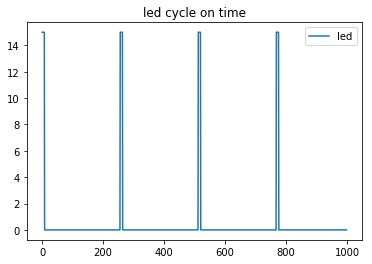

In [22]:
BDCLedData=Peeker.to_dataframe()
BDCLedData=BDCLedData[BDCLedData['clk']==1]
BDCLedData.reset_index(drop=True, inplace=True)
BDCLedData.plot(y='led', title='led cycle on time');

## Verilog Code

In [23]:
DUT.convert()
VerilogTextReader('BDCLed');

***Verilog modual from BDCLed.v***

 // File: BDCLed.v
// Generated by MyHDL 0.10
// Date: Mon Aug 20 12:44:39 2018


`timescale 1ns/10ps

module BDCLed (
    clk,
    led
);
// FPGA Hello world of counter duty cycle led brightness control
// https://timetoexplore.net/blog/arty-fpga-verilog-02
// 
// Target:
//     ZYNQ 7000 Board (Arty, PYNQ-Z1, PYNQ-Z2) with at least 4 leds
// 
// 
// Input:
//     clk(bool): clock input    
// Ouput:
//     led(4bitVec): led output to PYNQ-Z1/2 (ect.)
//     

input clk;
output [3:0] led;
reg [3:0] led;

wire [7:0] duty_led;
reg [7:0] counter = 0;

assign duty_led = 8'd8;


always @(posedge clk) begin: BDCLED_LOGIC
    counter <= (counter + 1);
    if ((counter < duty_led)) begin
        led <= 15;
    end
    else begin
        led <= 0;
    end
end

endmodule



/home/iridium/anaconda3/lib/python3.6/site-packages/myhdl/conversion/_toVerilog.py:349: ToVerilogWarning: Signal is not driven: duty_led
  category=ToVerilogWarning


\begin{figure}
\centerline{\includegraphics[width=10cm]{BDCLed_RTL.png}}
\caption{\label{fig:BDCLedRTL} BDCLed RTL schematic; Xilinx Vivado 2017.4}
\end{figure}

\begin{figure}
\centerline{\includegraphics[width=10cm]{BDCLed_SYN.png}}
\caption{\label{fig:BDCLedSYN} BDCLed Synthesized Schematic; Xilinx Vivado 2017.4}
\end{figure}

\begin{figure}
\centerline{\includegraphics[width=10cm]{BDCLed_IMP.png}}
\caption{\label{fig:BDCLedSYN} BDCLed Implementated Schematic; Xilinx Vivado 2017.4}
\end{figure}

## PYNQ-Z1 Constraints File
uses the same constraint file `constrs_countLED.xdc` as the project **Project 3: Countdown**

## Verilog Testbench

In [24]:
@block
def BDCLed_TBV():
    """
    myHDL -> Verilog Testbench for `BDCLed`
    """

    clk=Signal(bool(0))
    led=Signal(intbv(0)[4:])
    
    @always_comb
    def print_data():
        print(sw, clk, led)

    DUT=BDCLed(clk, led)
    
    
    @instance
    def clk_signal():
        while True:
            clk.next = not clk
            yield delay(1)
        
    @instance
    def stimules():
        i=0
        while True:
            if i==1000:
                raise StopSimulation()
            i+=1
            yield clk.posedge
    
    return instances()
            
TB=BDCLed_TBV()
TB.convert(hdl="Verilog", initial_values=True)
VerilogTextReader('BDCLed_TBV');

<class 'myhdl._Signal._Signal'> <class '_ast.Name'>
<class 'myhdl._Signal._Signal'> <class '_ast.Name'>
<class 'myhdl._Signal._Signal'> <class '_ast.Name'>
***Verilog modual from BDCLed_TBV.v***

 // File: BDCLed_TBV.v
// Generated by MyHDL 0.10
// Date: Mon Aug 20 12:45:05 2018


`timescale 1ns/10ps

module BDCLed_TBV (

);
// myHDL -> Verilog Testbench for `BDCLed`


reg clk = 0;
wire [1:0] sw;
reg [3:0] led = 0;
wire [7:0] BDCLed0_0_duty_led;
reg [7:0] BDCLed0_0_counter = 0;

assign sw = 2'd0;
assign BDCLed0_0_duty_led = 8'd8;


always @(led, sw, clk) begin: BDCLED_TBV_PRINT_DATA
    $write("%h", sw);
    $write(" ");
    $write("%h", clk);
    $write(" ");
    $write("%h", led);
    $write("\n");
end


always @(posedge clk) begin: BDCLED_TBV_BDCLED0_0_LOGIC
    BDCLed0_0_counter <= (BDCLed0_0_counter + 1);
    if ((BDCLed0_0_counter < BDCLed0_0_duty_led)) begin
        led <= 15;
    end
    else begin
        led <= 0;
    end
end


initial begin: BDCLED_TBV_CLK_SIGNAL
    while (

/home/iridium/anaconda3/lib/python3.6/site-packages/myhdl/conversion/_toVerilog.py:349: ToVerilogWarning: Signal is not driven: sw
  category=ToVerilogWarning
/home/iridium/anaconda3/lib/python3.6/site-packages/myhdl/conversion/_toVerilog.py:349: ToVerilogWarning: Signal is not driven: BDCLed0_0_duty_led
  category=ToVerilogWarning


## Board Verification
https://www.youtube.com/watch?v=iL0Y0j9dEnE

# Project 5: Mid-level pwm LED
From https://timetoexplore.net/blog/arty-fpga-verilog-02 creates a mildly complex Pulse Width Modulator (pwm) module to then be deployed in a top module counter/assignment module to create various level pwm brightness for each of the LEDs

### pwm myHDL Code

In [25]:
@block
def pwm(clk, dutyCount, ofState):
    """
    pwm module
    
    Inputs:
        clk(bool): clock
        dutyCount(bitVec): clock cycle percent on time value
        using an 8Bit internal counter
        
    Ouputs:
        ofState(bool): on/off state signal of the PWM
    
    """
    counter=Signal(modbv(0)[8:])
    
    @always(clk.posedge)
    def logic():
        counter.next=counter+1
        ofState.next=counter<dutyCount
    
    return instances()

### pwm myHDL Testing

In [26]:
Peeker.clear()

clk=Signal(bool(0)); Peeker(clk, 'clk')
dutyCount=Signal(intbv(0)[8:]); Peeker(dutyCount, 'dutyCount')
ofState=Signal(bool(0)); Peeker(ofState, 'ofState')

DUT=pwm(clk, dutyCount, ofState)

def pwm_TB():
    """
    myHDL only Testbench for `pwm`
    """
    
    @always(delay(1))
    def ClkGen():
        clk.next=not clk
        
    @instance
    def stimules():
        i=0
        while True:
            if i==5:
                dutyCount.next=20
            elif i==45:
                dutyCount.next=80
            elif i==100:
                raise StopSimulation()
            i+=1
            yield clk.posedge
    
    return instances()

sim=Simulation(DUT, pwm_TB(), *Peeker.instances()).run()

In [27]:
Peeker.to_wavedrom()

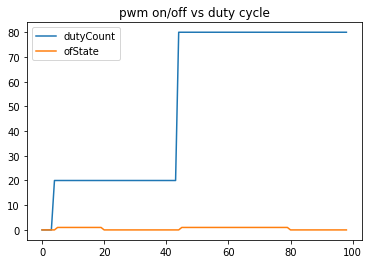

In [28]:
pwmData=Peeker.to_dataframe()
pwmData=pwmData[pwmData['clk']==1]
pwmData.reset_index(drop=True, inplace=True)
pwmData.plot(y=['dutyCount', 'ofState'], title='pwm on/off vs duty cycle');

### pwm Verilog Code

In [29]:
DUT.convert()
VerilogTextReader('pwm');

***Verilog modual from pwm.v***

 // File: pwm.v
// Generated by MyHDL 0.10
// Date: Mon Aug 20 12:45:49 2018


`timescale 1ns/10ps

module pwm (
    clk,
    dutyCount,
    ofState
);
// pwm module
// 
// Inputs:
//     clk(bool): clock
//     dutyCount(bitVec): clock cycle percent on time value
//     using an 8Bit internal counter
//     
// Ouputs:
//     ofState(bool): on/off state signal of the PWM

input clk;
input [7:0] dutyCount;
output ofState;
reg ofState;

reg [7:0] counter = 0;



always @(posedge clk) begin: PWM_LOGIC
    counter <= (counter + 1);
    ofState <= (counter < dutyCount);
end

endmodule



\begin{figure}
\centerline{\includegraphics[width=10cm]{pwm_RTL.png}}
\caption{\label{fig:pwmRTL} pwm RTL schematic; Xilinx Vivado 2017.4}
\end{figure}

\begin{figure}
\centerline{\includegraphics[width=10cm]{pwm_SYN.png}}
\caption{\label{fig:pwmSYN} pwm Synthesized Schematic; Xilinx Vivado 2017.4}
\end{figure}

### pwm PYNQ-Z1 Constraints File
this module is a sup module and therefore was not taken beyond synthesis and thus has no constraint file

### pwm Verilog Testbench

In [30]:
@block
def pwm_TBV():
    """
    myHDL-> Verilog Testbench for `pwm`
    """

    clk=Signal(bool(0))
    dutyCount=Signal(intbv(0)[8:])
    ofState=Signal(bool(0))
    
    @always_comb
    def print_data():
        print(clk, dutyCount, ofState)

    DUT=pwm(clk, dutyCount, ofState)
    
    @instance
    def clk_signal():
        while True:
            clk.next = not clk
            yield delay(1)
        
    @instance
    def stimules():
        i=0
        while True:
            if i==5:
                dutyCount.next=20
            elif i==45:
                dutyCount.next=80
            elif i==100:
                raise StopSimulation()
            else:
                pass
            i+=1
            yield clk.posedge
    
    return instances()

TB=pwm_TBV()
TB.convert(hdl="Verilog", initial_values=True)
VerilogTextReader('pwm_TBV');

<class 'myhdl._Signal._Signal'> <class '_ast.Name'>
<class 'myhdl._Signal._Signal'> <class '_ast.Name'>
<class 'myhdl._Signal._Signal'> <class '_ast.Name'>
***Verilog modual from pwm_TBV.v***

 // File: pwm_TBV.v
// Generated by MyHDL 0.10
// Date: Mon Aug 20 12:45:58 2018


`timescale 1ns/10ps

module pwm_TBV (

);
// myHDL-> Verilog Testbench for `pwm`


reg clk = 0;
reg [7:0] dutyCount = 0;
reg ofState = 0;
reg [7:0] pwm0_0_counter = 0;



always @(dutyCount, ofState, clk) begin: PWM_TBV_PRINT_DATA
    $write("%h", clk);
    $write(" ");
    $write("%h", dutyCount);
    $write(" ");
    $write("%h", ofState);
    $write("\n");
end


always @(posedge clk) begin: PWM_TBV_PWM0_0_LOGIC
    pwm0_0_counter <= (pwm0_0_counter + 1);
    ofState <= (pwm0_0_counter < dutyCount);
end


initial begin: PWM_TBV_CLK_SIGNAL
    while (1'b1) begin
        clk <= (!clk);
        # 1;
    end
end


initial begin: PWM_TBV_STIMULES
    integer i;
    i = 0;
    while (1'b1) begin
        case (i)
      

## top myHDL Code

In [31]:
@block
def top(clk, led):
    """
    FPGA Hello world multible pwm duty cycle controled leds
    https://timetoexplore.net/blog/arty-fpga-verilog-02
    
    Target:
        ZYNQ 7000 Board (Arty, PYNQ-Z1, PYNQ-Z2) with at least 4 leds
    
    
    Input:
        clk(bool): clock input    
    Ouput:
        led(4bitVec): led output to PYNQ-Z1/2 (ect.)
        
    """
    led_i=[Signal(bool(0)) for _ in range(4)]
    pwmled0=pwm(clk=clk, dutyCount=Signal(intbv(4)[8:]), ofState=led_i[0])
    pwmled1=pwm(clk=clk, dutyCount=Signal(intbv(16)[8:]), ofState=led_i[1])
    pwmled2=pwm(clk=clk, dutyCount=Signal(intbv(64)[8:]), ofState=led_i[2])
    pwmled3=pwm(clk=clk, dutyCount=Signal(intbv(255)[8:]), ofState=led_i[3])
    
    @always_comb
    def ouputBuffer():
        led.next=concat(led_i[3], led_i[2], led_i[1], led_i[0])
    return instances()

## myHDL Testing

In [32]:
Peeker.clear()
clk=Signal(bool(0)); Peeker(clk, 'clk')
led=Signal(intbv(0)[4:]); Peeker(led, 'led')

DUT=top(clk, led)


def top_TB():
    """
    myHDL only Testbench for `top`
    """
    @always(delay(1))
    def ClkGen():
        clk.next=not clk
        
    @instance
    def stimules():
        i=0
        while True:
            if i==1000:
                raise StopSimulation()
            i+=1
            yield clk.posedge
    
    return instances()

sim=Simulation(DUT, top_TB(), *Peeker.instances()).run()

In [33]:
Peeker.to_wavedrom()

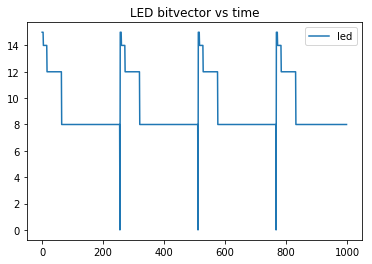

In [34]:
topData=Peeker.to_dataframe()
topData=topData[topData['clk']==1]
topData.reset_index(drop=True, inplace=True)
topData.plot(y='led', title='LED bitvector vs time');

## Verilog Code

In [35]:
DUT.convert()
VerilogTextReader('top');

***Verilog modual from top.v***

 // File: top.v
// Generated by MyHDL 0.10
// Date: Mon Aug 20 12:46:43 2018


`timescale 1ns/10ps

module top (
    clk,
    led
);
// FPGA Hello world multible pwm duty cycle controled leds
// https://timetoexplore.net/blog/arty-fpga-verilog-02
// 
// Target:
//     ZYNQ 7000 Board (Arty, PYNQ-Z1, PYNQ-Z2) with at least 4 leds
// 
// 
// Input:
//     clk(bool): clock input    
// Ouput:
//     led(4bitVec): led output to PYNQ-Z1/2 (ect.)
//     

input clk;
output [3:0] led;
wire [3:0] led;

wire [7:0] pwm0_0_1_dutyCount;
reg [7:0] pwm0_0_1_counter = 0;
wire [7:0] pwm1_0_dutyCount;
reg [7:0] pwm1_0_counter = 0;
wire [7:0] pwm2_dutyCount;
reg [7:0] pwm2_counter = 0;
wire [7:0] pwm3_dutyCount;
reg [7:0] pwm3_counter = 0;
reg led_i [0:4-1];

initial begin: INITIALIZE_LED_I
    integer i;
    for(i=0; i<4; i=i+1) begin
        led_i[i] = 0;
    end
end


assign pwm0_0_1_dutyCount = 8'd4;
assign pwm1_0_dutyCount = 8'd16;
assign pwm2_dutyCount = 8'd64;
ass

/home/iridium/anaconda3/lib/python3.6/site-packages/myhdl/conversion/_toVerilog.py:349: ToVerilogWarning: Signal is not driven: pwm0_0_1_dutyCount
  category=ToVerilogWarning
/home/iridium/anaconda3/lib/python3.6/site-packages/myhdl/conversion/_toVerilog.py:349: ToVerilogWarning: Signal is not driven: pwm1_0_dutyCount
  category=ToVerilogWarning
/home/iridium/anaconda3/lib/python3.6/site-packages/myhdl/conversion/_toVerilog.py:349: ToVerilogWarning: Signal is not driven: pwm2_dutyCount
  category=ToVerilogWarning
/home/iridium/anaconda3/lib/python3.6/site-packages/myhdl/conversion/_toVerilog.py:349: ToVerilogWarning: Signal is not driven: pwm3_dutyCount
  category=ToVerilogWarning


\begin{figure}
\centerline{\includegraphics[width=10cm]{top_RTL.png}}
\caption{\label{fig:topRTL} top RTL schematic; Xilinx Vivado 2017.4}
\end{figure}

\begin{figure}
\centerline{\includegraphics[width=10cm]{top_SYN.png}}
\caption{\label{fig:topSYN} top Synthesized Schematic; Xilinx Vivado 2017.4}
\end{figure}

\begin{figure}
\centerline{\includegraphics[width=10cm]{top_IMP.png}}
\caption{\label{fig:topSYN} top Implementated Schematic; Xilinx Vivado 2017.4}
\end{figure}

## PYNQ-Z1 Constraints File
uses the same constraint file `constrs_countLED.xdc` as the project **Project 3: Countdown**

## Verilog Testbench

In [36]:
@block
def top_TBV():
    """
    myHDL -> Verilog Testbench for `top`
    """

    clk=Signal(bool(0))
    led=Signal(intbv(0)[4:])
    
    @always_comb
    def print_data():
        print(clk, led)

    DUT=top(clk, led)
    
    @instance
    def clk_signal():
        while True:
            clk.next = not clk
            yield delay(1)
        
    @instance
    def stimules():
        i=0
        while True:
            if i==1000:
                raise StopSimulation()
            
            i+=1
            yield clk.posedge
    
    return instances()

TB=top_TBV()
TB.convert(hdl="Verilog", initial_values=True)
VerilogTextReader('top_TBV');

<class 'myhdl._Signal._Signal'> <class '_ast.Name'>
<class 'myhdl._Signal._Signal'> <class '_ast.Name'>
***Verilog modual from top_TBV.v***

 // File: top_TBV.v
// Generated by MyHDL 0.10
// Date: Mon Aug 20 12:46:54 2018


`timescale 1ns/10ps

module top_TBV (

);
// myHDL -> Verilog Testbench for `top`


reg clk = 0;
wire [3:0] led;
wire [7:0] top0_0_pwm0_0_1_2_dutyCount;
reg [7:0] top0_0_pwm0_0_1_2_counter = 0;
wire [7:0] top0_0_pwm1_0_1_dutyCount;
reg [7:0] top0_0_pwm1_0_1_counter = 0;
wire [7:0] top0_0_pwm2_0_dutyCount;
reg [7:0] top0_0_pwm2_0_counter = 0;
wire [7:0] top0_0_pwm3_0_dutyCount;
reg [7:0] top0_0_pwm3_0_counter = 0;
reg top0_0_led_i [0:4-1];

initial begin: INITIALIZE_TOP0_0_LED_I
    integer i;
    for(i=0; i<4; i=i+1) begin
        top0_0_led_i[i] = 0;
    end
end


assign top0_0_pwm0_0_1_2_dutyCount = 8'd4;
assign top0_0_pwm1_0_1_dutyCount = 8'd16;
assign top0_0_pwm2_0_dutyCount = 8'd64;
assign top0_0_pwm3_0_dutyCount = 8'd255;


always @(led, clk) begin: TOP_TBV_PR

/home/iridium/anaconda3/lib/python3.6/site-packages/myhdl/conversion/_toVerilog.py:349: ToVerilogWarning: Signal is not driven: top0_0_pwm0_0_1_2_dutyCount
  category=ToVerilogWarning
/home/iridium/anaconda3/lib/python3.6/site-packages/myhdl/conversion/_toVerilog.py:349: ToVerilogWarning: Signal is not driven: top0_0_pwm1_0_1_dutyCount
  category=ToVerilogWarning
/home/iridium/anaconda3/lib/python3.6/site-packages/myhdl/conversion/_toVerilog.py:349: ToVerilogWarning: Signal is not driven: top0_0_pwm2_0_dutyCount
  category=ToVerilogWarning
/home/iridium/anaconda3/lib/python3.6/site-packages/myhdl/conversion/_toVerilog.py:349: ToVerilogWarning: Signal is not driven: top0_0_pwm3_0_dutyCount
  category=ToVerilogWarning


## Board Verification
https://www.youtube.com/watch?v=DN-Hrm7YbpQ